<ipython-input-2-cb864885ac2a>:45: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  T = np.array([[E, Nu, t,0, 0 ],


TypeError: can't multiply sequence by non-int of type 'float'

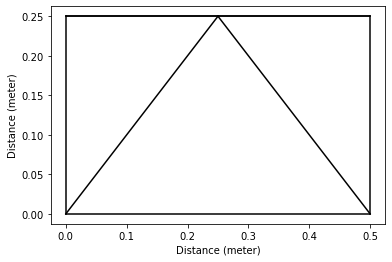

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os

E = 200e06
A = 0.005
Nu = 0.3
t =0.025
L =0.5
nodes = [[0, 0], [0.5, 0], [0.5, 0.25], [0.0, 0.25],[0.25,0.25]]
#([[1, 2], [1, 3], [2, 3], [2, 4], [2, 5], [3, 5], [4, 5], [4, 6], [5, 6]]) - 1

connections = np.array([[1, 2], [2, 3], [3,4],[4,1], [1, 5], [5, 2],[5,4],[5,3]]) -1

no_nodes = len(nodes)
K_Structure = np.zeros((no_nodes*2, no_nodes*2))
F_Structure = np.zeros((no_nodes*2, 1))
x = []
y = []
plt.figure()
for connection in connections:
    initial, final = connection
    x1, y1 = nodes[initial]
    x2, y2 = nodes[final]
    plt.xlabel("Distance (meter)")
    plt.ylabel("Distance (meter)")
    plt.plot([x1, x2], [y1, y2], color='black')


#Developing Global stiffness matrix and Defining loads for member of Structure

support_nodes = [[0, 0], [0, 0.25]]

temp_res_dof = []
temp_free_dof = []

for member in connections:
    initial_node_index, final_node_index = member
    x1, y1  = nodes[initial_node_index]
    x2, y2 = nodes[final_node_index]



    T = np.array([[E, Nu, t,0, 0 ],
                [0, 0, 0.25, 0,0 , 0.5]])
    Tt = T.transpose()
 
    K = np.array([[1, -1],
                [-1, 1]]) * (A * E / L)
 
    K_G_local = np.dot(np.dot(Tt, K), T)
    dof = [initial_node_index*2, initial_node_index*2 + 1,
        final_node_index*2, final_node_index*2 + 1]
    K_Structure[np.ix_(dof, dof)] += K_G_local
    
    if (member[0] == 0) and (member[1] == 1):
        temp_f = np.array([[0], [0], [20], [0]])
        F_Structure[np.ix_(dof)] += temp_f

    if nodes[initial_node_index] in support_nodes:
        temp_res_dof.append(initial_node_index*2)
        temp_res_dof.append(initial_node_index*2 + 1)
    else:
        temp_free_dof.append(initial_node_index*2)
        temp_free_dof.append(initial_node_index*2 + 1)
  
    if nodes[final_node_index] in support_nodes:
        temp_res_dof.append(final_node_index*2)
        temp_res_dof.append(final_node_index*2 + 1)
    else:
        temp_free_dof.append(final_node_index*2)
        temp_free_dof.append(final_node_index*2 + 1)

res_dof = []
free_dof = []
for item in temp_free_dof:
    if item not in free_dof:
        free_dof.append(item)
for item in temp_res_dof:
    if item not in res_dof:
        res_dof.append(item)

print("\nGlobal stiffness matrix and loads for member of Structure is defined.. \n",K_Structure)

print("\nRes dof number : {}\nfree dof number : {}\n".format(len(res_dof), len(free_dof)))

# Displacement and Support Reaction Calculation

K_ff = K_Structure[np.ix_(free_dof, free_dof)]
K_rf = K_Structure[np.ix_(res_dof, free_dof)]
F_ff = F_Structure[np.ix_(free_dof)]
Displacements = np.dot(np.linalg.inv(K_ff), F_ff)
reactions = np.dot(K_rf, Displacements)
print("Support Reactions (kN) \n",reactions)
print("Displacements \n",Displacements)

# Stress calculation in each member
k_temp = K_Structure[2:10, 2:10]
force = k_temp @ Displacements
Stress = force/A
print("Stress in Each Element \n",Stress)